<a href="https://colab.research.google.com/github/Hegazian/Deep_Learning/blob/master/Catagoral_Deep_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1]]
X,y = datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.35)

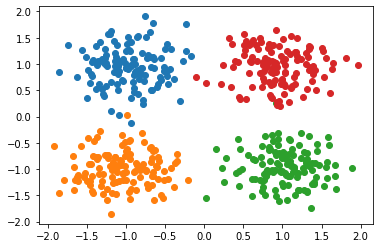

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.show()

In [ ]:
print(y)

[3 2 3 0 2 1 0 3 3 3 2 2 0 0 1 3 3 3 3 0 3 0 2 3 1 2 1 0 3 2 2 1 0 3 1 0 3
 0 3 0 0 2 2 0 2 0 2 3 0 3 0 1 2 0 1 3 3 0 2 3 0 2 0 3 1 1 1 2 2 1 2 1 1 1
 2 1 3 1 2 3 0 1 3 2 1 1 3 2 2 3 1 0 3 1 3 3 1 1 3 0 3 2 1 3 3 1 1 2 2 2 1
 2 0 0 1 0 3 3 3 3 1 3 2 2 1 3 3 0 1 0 1 0 0 3 0 1 0 3 3 0 3 2 3 3 2 3 0 0
 0 3 2 0 3 1 0 1 2 1 2 0 1 1 2 3 3 1 2 1 3 2 2 1 1 2 3 0 0 1 0 1 3 3 2 1 2
 1 2 1 0 2 3 1 0 0 0 0 3 2 0 3 2 2 3 1 0 3 3 1 1 1 2 0 3 3 0 1 3 2 3 0 3 0
 1 2 2 0 0 0 3 2 3 2 3 0 0 1 1 3 0 3 1 3 2 1 2 3 3 2 2 1 0 1 3 1 1 1 3 3 1
 0 0 1 2 2 2 2 2 3 2 2 2 0 0 0 3 0 2 0 0 0 3 1 2 1 3 2 0 0 1 2 1 2 2 1 2 0
 0 0 3 1 1 1 0 0 0 1 0 0 1 1 3 1 3 1 1 3 0 0 1 3 0 2 3 3 3 2 3 0 1 2 1 3 1
 0 0 2 3 1 2 1 1 2 0 3 2 1 2 2 2 0 3 1 3 0 2 1 0 1 2 2 3 3 0 3 1 2 3 2 1 0
 3 2 3 1 1 2 3 2 0 2 2 2 2 0 1 3 3 3 0 2 2 1 3 0 3 0 0 3 1 2 1 2 0 1 0 0 1
 2 2 0 0 1 3 1 2 0 3 0 1 0 3 1 0 0 1 2 1 3 0 1 1 0 2 2 3 2 1 2 2 1 0 0 0 1
 3 3 2 1 0 2 1 3 2 3 3 0 0 2 1 0 0 2 1 2 3 3 2 1 2 2 0 1 2 0 1 1 2 0 1 2 3
 3 0 3 2 2 0 2 3 0 3 1 2 

In [ ]:
Y = to_categorical(y=y,num_classes=4)
print(Y)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
model = Sequential()

In [ ]:

model.add(Dense(4, input_shape=(2,),activation='softmax'))
model.compile(Adam(learning_rate=0.01),metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
h = model.fit(X,Y,batch_size=50,epochs=200,verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.8770 - accuracy: 0.7540
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.8500
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.8920
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.9300
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.9560
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.9680
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.9780
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.9820
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.9840
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.9860
Epoch 11/

Text(0.5, 0, 'epochs')

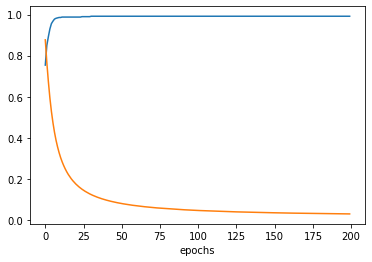

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])
plt.xlabel('epochs')

In [ ]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


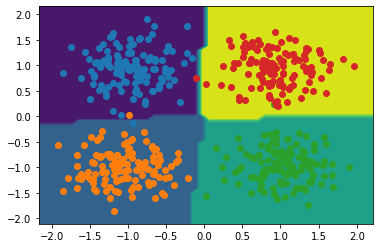

In [ ]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])

prediction is:  [0]


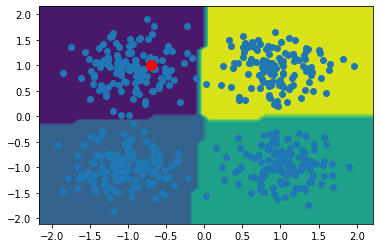

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = -0.7
y = 1
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)